In [116]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [117]:
data = web.DataReader('DIS', data_source='yahoo',
                              start='2010-12-31', end = '2016-12-31')['Adj Close']

In [118]:
data = DataFrame(data)

In [119]:
data.rename(columns={'Adj Close': 'price' }, inplace = True)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2010-12-31 to 2016-12-30
Data columns (total 1 columns):
price    1511 non-null float64
dtypes: float64(1)
memory usage: 23.6 KB


In [121]:
#Add SMA
data['SMA1'] = data['price'].rolling(1).mean()
data['SMA2'] = data['price'].rolling(186).mean()

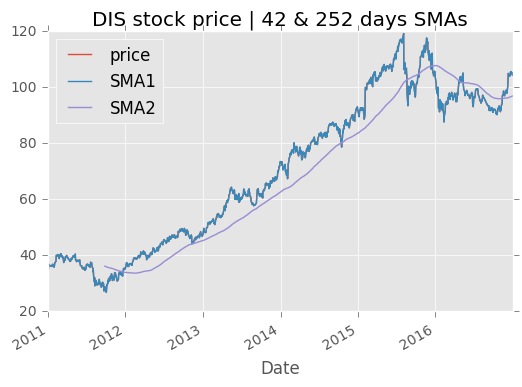

In [122]:
data[['price','SMA1','SMA2']].plot(title='DIS stock price | 42 & 252 days SMAs');

In [123]:
#SMA strategy
data['position'] = np.where(data['SMA1'] > data['SMA2'],1,-1)
#drop NAs
data.dropna(inplace=True)

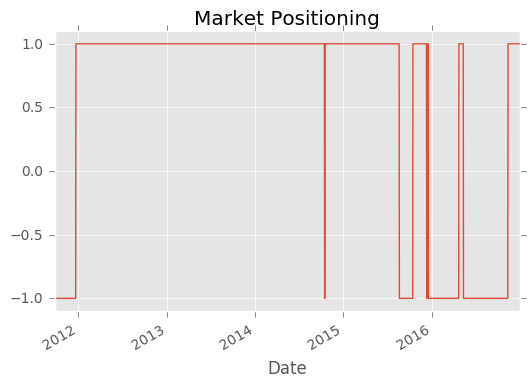

In [124]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning');

In [125]:
#Calculate Disney log returns
data['returns']=np.log(data['price'] / data['price'].shift(1))
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data['strategy'] = data['position'].shift(1) * data['returns']
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

# absolute performance of the strategy
aperf = data['cstrategy'].ix[-1]
# out-/underperformance of strategy
operf = aperf - data['creturns'].ix[-1]
aperf, operf

(2.2791451361046238, -1.4614815290431191)

In [126]:
data[['returns','strategy']].sum().apply(np.exp)

returns     3.740627
strategy    2.279145
dtype: float64

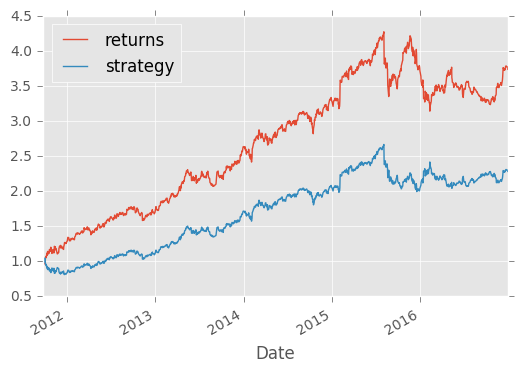

In [127]:
#strategy didn't do so well!
data[['returns', 'strategy']].cumsum().apply(np.exp).plot();
